In [9]:
import pandas as pd
import numpy as np
from scipy.stats import norm,binom
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('C:\\Training\\Phase 1\\Dataset\\Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
higher_order_days = df.groupby('Order Date')["Quantity"].sum() > 50
print(higher_order_days)

Order Date
01-01-2014    False
01-02-2011    False
01-02-2013    False
01-03-2011    False
01-03-2012    False
              ...  
31-10-2014     True
31-12-2011     True
31-12-2012    False
31-12-2013    False
31-12-2014    False
Name: Quantity, Length: 1238, dtype: bool


In [12]:
higher_order_sum = higher_order_days.sum()
print(higher_order_sum)

245


In [13]:
total_days_count = higher_order_days.count()
print(total_days_count)

1238


In [14]:
probability_high_order = higher_order_sum / total_days_count
print(probability_high_order)
print(f"P(Higher Order): {probability_high_order:.2f}")

0.19789983844911146
P(Higher Order): 0.20


In [ ]:
n = total_days_count
p= probability_high_order
mu = n*p
sigma = np.sqrt(n*p*(1-p))
x = np.arrange(0,n+1)

245.0 14.018364368925772


In [16]:
pdf_values = norm.pdf(x,mu,sigma)
print(pdf_values)

[1.33965364e-68 4.64872900e-68 1.60496640e-67 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


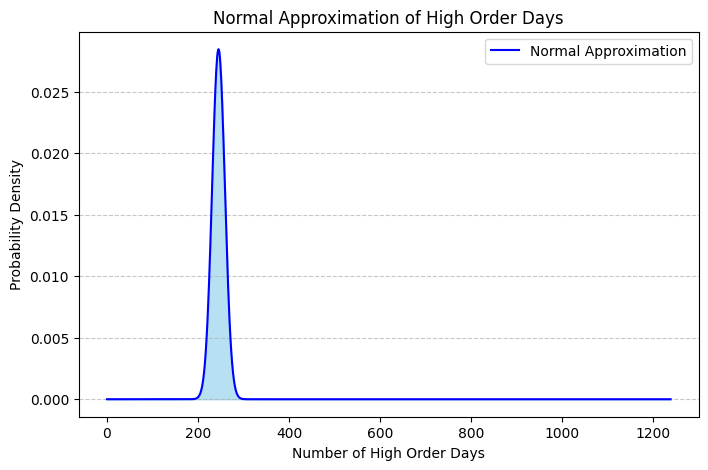

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_values, color='blue', label="Normal Approximation", alpha=1)
plt.fill_between(x, pdf_values, color='skyblue', alpha=0.6) 
plt.xlabel("Number of High Order Days")
plt.ylabel("Probability Density")
plt.title("Normal Approximation of High Order Days")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)